# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset I've selected for analysis is ["No-show appointments"](https://www.kaggle.com/joniarroba/noshowappointments).

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## A question that I plan on exploring over this report is below.

### "What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?"



In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### First of all, read and show the data.

In [2]:
# load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Show the data's shape and other infomations.

In [3]:
# shape
df.shape

(110527, 14)

In [4]:
# infomations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### And check whether there is NaN and duplication.

In [6]:
# NaN
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# duplication
sum(df.duplicated())

0

In [8]:
# It seems that there is no NaN and duplication ...

###  Next, Describe the data.

In [9]:
# describe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Ops! There are something to need to fix.

#### (1) Data types of "ScheduledDay" and "AppointmentDay" are not proper. It should be "datetime64".

#### (2) Minimum of "Age" is "-1". It doesnt make sense.

### Data Cleaning (convert data types and drop rows which "Age" is -1)

In [10]:
# drop 'PatientId' and 'AppointmentID'
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [11]:
# check duplication again
sum(df.duplicated())

635

In [12]:
# drop duplication
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [13]:
# convert data types
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [14]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109892 entries, 0 to 110526
Data columns (total 12 columns):
Gender            109892 non-null object
ScheduledDay      109892 non-null datetime64[ns]
AppointmentDay    109892 non-null datetime64[ns]
Age               109892 non-null int64
Neighbourhood     109892 non-null object
Scholarship       109892 non-null int64
Hipertension      109892 non-null int64
Diabetes          109892 non-null int64
Alcoholism        109892 non-null int64
Handcap           109892 non-null int64
SMS_received      109892 non-null int64
No-show           109892 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.9+ MB


In [15]:
# find rows which 'Age' is -1
df[df['Age'] == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
# drop the row
indx = df[df['Age'] == -1].index
df.drop(index=indx, axis=0,inplace=True)

In [17]:
# make sure there is no -1
df[df['Age'] == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [18]:
# show cleaned data
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Remaind the question. 
### "What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?"

#### So for each factors, I analyse the importance.

In [19]:
# create new columns
# 'AppointmentTiming' : how before patient had a appointment
# 'AppointmentDayoftheWeek : appointment day in week (0:Monday, 6:Sunday)
df['AppointmentTiming'] = df.AppointmentDay - df.ScheduledDay
df['AppointmentDayoftheWeek'] = df.AppointmentDay.dt.dayofweek

In [20]:
# show
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentTiming,AppointmentDayoftheWeek
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,4
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,4
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,4
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,4
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,4
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,1 days 15:23:09,4
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:54:48,4
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:20:02,4
8,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,-1 days +15:57:44,4
9,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,1 days 11:11:35,4


In [21]:
# define a function which show normalized histograms
def show_hist(df, column, s1, s2, label1, label2):
    counts = df[df[column] == s1]['No-show'].value_counts()
    counts = counts / sum(counts)
    plt.bar(['Show', 'Not-show'], counts, label=label1, alpha=0.5)
    print("------ " + label1+ " ------")
    print(counts)

    counts = df[df[column] == s2]['No-show'].value_counts()
    counts = counts / sum(counts)
    plt.bar(['Show', 'Not-show'], counts, label=label2, alpha=0.5)
    print("------ " + label2+ " ------")
    print(counts)

    # fig setting
    plt.legend()
    plt.xlabel('Show or Not')
    plt.ylabel('Proportion')
    plt.title('Proportion in ' + column);

## Gender is important to predict if a patient will show up? => NOT important.

------ Female ------
No     0.797594
Yes    0.202406
Name: No-show, dtype: float64
------ Male ------
No     0.801352
Yes    0.198648
Name: No-show, dtype: float64


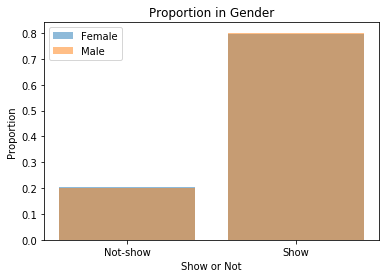

In [22]:
show_hist(df, 'Gender', 'F', 'M', 'Female', 'Male')

## AppointmentDay is important to predict if a patient will show up? => NOT important.

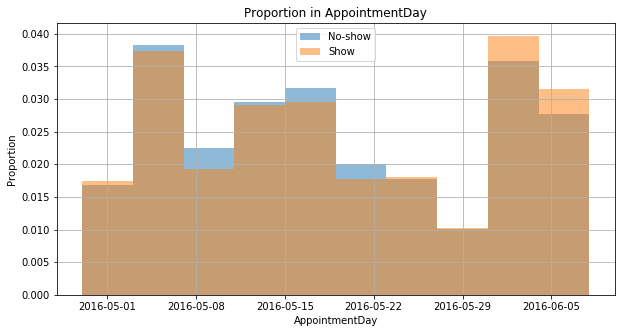

In [23]:
df[df['No-show'] == 'Yes']['AppointmentDay'].hist(figsize=(10,5),normed=1,alpha=0.5, label='No-show')
df[df['No-show'] == 'No']['AppointmentDay'].hist(figsize=(10,5),normed=1,alpha=0.5, label='Show')
plt.legend()
plt.title('Proportion in AppointmentDay')
plt.ylabel('Proportion')
plt.xlabel('AppointmentDay');

## Age is important to predict if a patient will show up? => Important.
> young age tends to be "No-show"

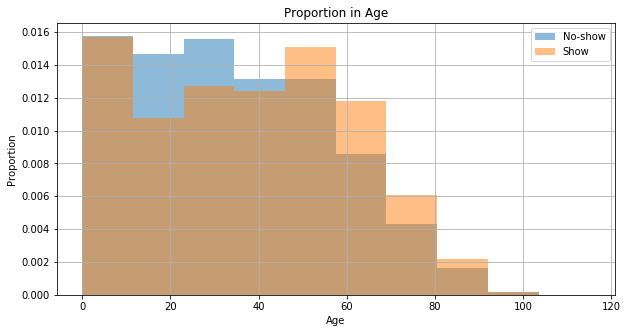

In [24]:
df[df['No-show'] == 'Yes']['Age'].hist(figsize=(10,5),normed=1,alpha=0.5, label='No-show')
df[df['No-show'] == 'No']['Age'].hist(figsize=(10,5),normed=1,alpha=0.5, label='Show')
plt.legend()
plt.title('Proportion in Age')
plt.ylabel('Proportion')
plt.xlabel('Age');

## Neighbourhood is important to predict if a patient will show up? => Important.
> There are area which there is more No-show patients

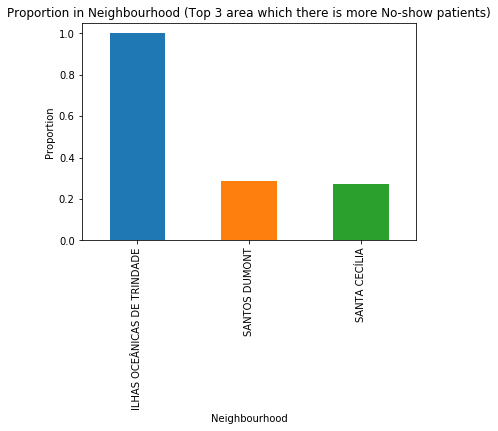

In [25]:
temp = df[df['No-show'] == 'Yes']['Neighbourhood'].value_counts() / df['Neighbourhood'].value_counts()
temp.sort_values(ascending=False)[0:3].plot(kind='bar');
plt.title('Proportion in Neighbourhood (Top 3 area which there is more No-show patients)')
plt.ylabel('Proportion')
plt.xlabel('Neighbourhood');

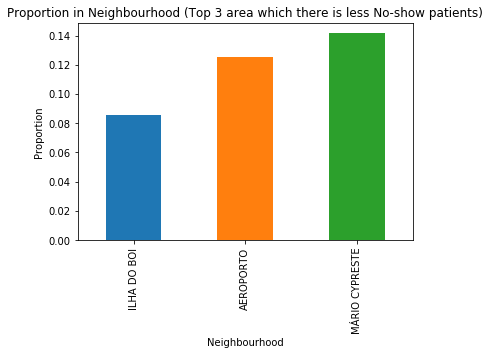

In [26]:
temp.sort_values(ascending=True)[0:3].plot(kind='bar');
plt.title('Proportion in Neighbourhood (Top 3 area which there is less No-show patients)')
plt.ylabel('Proportion')
plt.xlabel('Neighbourhood');

## Scholarship is important to predict if a patient will show up? => NOT important.

------ Scholarship ------
No     0.763355
Yes    0.236645
Name: No-show, dtype: float64
------ No-Scholarship ------
No     0.802785
Yes    0.197215
Name: No-show, dtype: float64


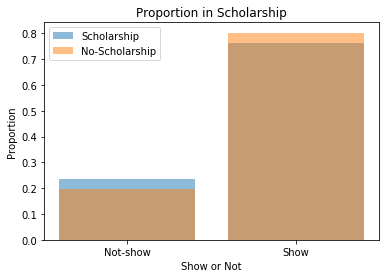

In [27]:
show_hist(df, 'Scholarship', 1, 0, 'Scholarship', 'No-Scholarship')

## Hipertension is important to predict if a patient will show up? => NOT important.

------ Hipertension ------
No     0.828013
Yes    0.171987
Name: No-show, dtype: float64
------ No-Hipertension ------
No     0.791759
Yes    0.208241
Name: No-show, dtype: float64


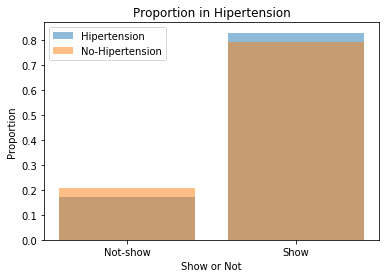

In [28]:
show_hist(df, 'Hipertension', 1, 0, 'Hipertension', 'No-Hipertension')

## Diabetes is important to predict if a patient will show up? => NOT important.

------ Diabetes ------
No     0.81984
Yes    0.18016
Name: No-show, dtype: float64
------ No-Diabetes ------
No     0.79729
Yes    0.20271
Name: No-show, dtype: float64


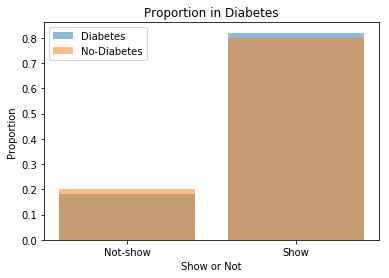

In [29]:
show_hist(df, 'Diabetes', 1, 0, 'Diabetes', 'No-Diabetes')

## Alcoholism is important to predict if a patient will show up? => NOT important.

------ Alcoholism ------
No     0.800239
Yes    0.199761
Name: No-show, dtype: float64
------ No-Alcoholism ------
No     0.798868
Yes    0.201132
Name: No-show, dtype: float64


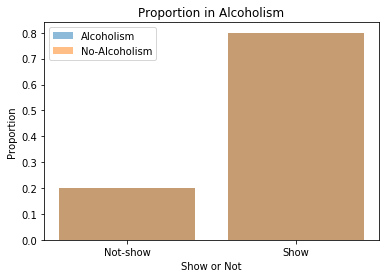

In [30]:
show_hist(df, 'Alcoholism', 1, 0, 'Alcoholism', 'No-Alcoholism')

## Handcap is important to predict if a patient will show up? => Important.

> If "Handcap" is over 3, they tend to be "No-show"

------ Handcap ------
No     0.714286
Yes    0.285714
Name: No-show, dtype: float64
------ No-Handcap ------
No     0.798921
Yes    0.201079
Name: No-show, dtype: float64


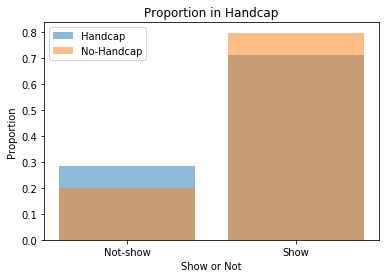

In [31]:
column = 'Handcap'
s1 = 3; s2 = 2
label1 = 'Handcap'; label2 = 'No-Handcap'

counts = df[df[column] >= s1]['No-show'].value_counts()
counts = counts / sum(counts)
plt.bar(['Show', 'Not-show'], counts, label=label1, alpha=0.5)
print("------ " + label1+ " ------")
print(counts)

counts = df[df[column] <= s2]['No-show'].value_counts()
counts = counts / sum(counts)
plt.bar(['Show', 'Not-show'], counts, label=label2, alpha=0.5)
print("------ " + label2+ " ------")
print(counts)

# fig setting
plt.legend()
plt.xlabel('Show or Not')
plt.ylabel('Proportion')
plt.title('Proportion in ' + column);

## SMS_received is important to predict if a patient will show up? => Important.

> If patient receive SMS, they tend to be "No-show"

------ SMS_received ------
No     0.724255
Yes    0.275745
Name: No-show, dtype: float64
------ No-SMS_received ------
No     0.834509
Yes    0.165491
Name: No-show, dtype: float64


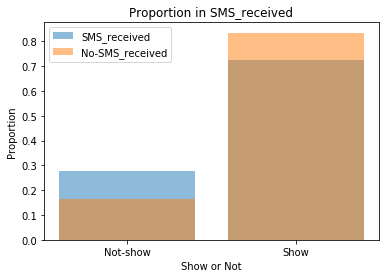

In [32]:
show_hist(df, 'SMS_received', 1, 0, 'SMS_received', 'No-SMS_received')

## AppointmentTiming is important to predict if a patient will show up? => Important.

> If patient have appointment for today or over 10 days after, they tend to be "No-show"

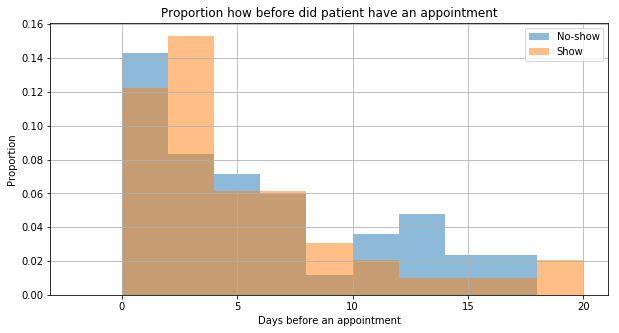

In [33]:
bins = [-2,0,2,4,6,8,10,12,14,16,18,20]
df[df['No-show'] == 'Yes']['AppointmentTiming'].dt.round("D").value_counts().hist(figsize=(10,5),normed=1,alpha=0.5, label='No-show',bins=bins)
df[df['No-show'] == 'No']['AppointmentTiming'].dt.round("D").value_counts().hist(figsize=(10,5),normed=1,alpha=0.5, label='Show',bins=bins)

# fig setting
plt.legend()
plt.xlabel('Days before an appointment')
plt.ylabel('Proportion')
plt.title('Proportion how before did patient have an appointment');

## AppointmentDayofWeek is important to predict if a patient will show up? => Important.

> If patient have appointment on Monday or Friday, they tend to be "No-show"

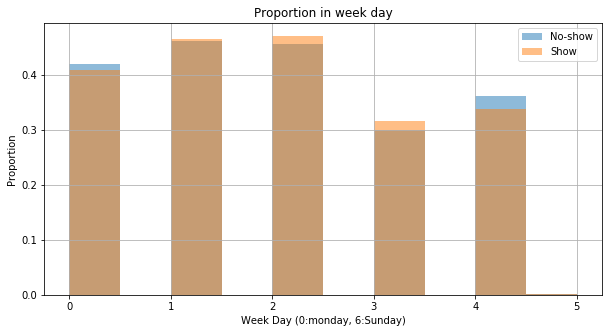

In [34]:
df[df['No-show'] == 'Yes']['AppointmentDayoftheWeek'].hist(figsize=(10,5),normed=1,alpha=0.5,label='No-show')
df[df['No-show'] == 'No']['AppointmentDayoftheWeek'].hist(figsize=(10,5),normed=1,alpha=0.5,label='Show')
# fig setting
plt.legend()
plt.xlabel('Week Day (0:monday, 6:Sunday)')
plt.ylabel('Proportion')
plt.title('Proportion in week day');

<a id='conclusions'></a>
## Conclusions

### Analysis result is show at a following table.

#### The table show which factor is important to predict if a patient will show up.  ( ○ : important, ✖️ : not important )

|Gender | ScheduledDay | AppointmentDay | Age |	Neighbourhood |	Scholarship | Hipertension | Diabetes |	Alcoholism | Handcap | SMS_received | AppointmentTiming | AppointmentDayoftheWeek |
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|✖️|✖️|✖️|○|○|✖️|✖️|✖️|✖️|○|○|○|○|

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0